In [17]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat


In [18]:
## centroid function
def find_closest_centroids(X, centroids):
   m = X.shape[0]  #300
   k = centroids.shape[0] #3
   idx = np.zeros(m) #300zero
   
   
   for i in range(m):
       min_dist = 1000000
       for j in range(k):
           dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
           if dist < min_dist:
               min_dist = dist
               idx[i] = j
   
   return idx



In [19]:
#select random points
def init_centroids(X, k):    #X:shape, k: number of centroids
   m, n = X.shape
   centroids = np.zeros((k, n))
   idx = np.random.randint(0, m, k)   #choos random k=3 points from 0 to m=300.
   
   for i in range(k):
       centroids[i,:] = X[idx[i],:]
   
   return centroids


In [20]:
## centroid maker
def compute_centroids(X, idx, k):
   m, n = X.shape
   centroids = np.zeros((k, n))
   
   for i in range(k):
       indices = np.where(idx == i)
       centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
   
   return centroids



In [21]:
## k means function
def run_k_means(X, initial_centroids, max_iters):
   m, n = X.shape
   k = initial_centroids.shape[0]
   idx = np.zeros(m)
   centroids = initial_centroids
   
   for i in range(max_iters):
       idx = find_closest_centroids(X, centroids)
       centroids = compute_centroids(X, idx, k)
   
   return idx, centroids



In [52]:
def pca(X):
#    # normalize the features
   X = (X - X.mean()) / X.std()
   
   # compute the covariance matrix
   X = np.matrix(X)
   cov = (X.T * X) / X.shape[0]  #2*50 * 50*2 = 2*2  
   print('cov \n', cov)
   print()
   # perform SVD
   U, S, V = np.linalg.svd(cov) # singular value decomposition
   
   return U, S, V



In [54]:
def project_data(X, U, k):
   U_reduced = U[:,:k]
   return np.dot(X, U_reduced)



In [55]:
def recover_data(Z, U, k):
   U_reduced = U[:,:k]
   return np.dot(Z, U_reduced.T)



In [25]:
#load data

data = loadmat('ex7data2.mat')
print(data)
print(data['X'])
print(data['X'].shape)




{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011', '__version__': '1.0', '__globals__': [], 'X': array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.0173201

In [26]:
# classify points 
X = data['X']
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
initial_centroids = np.array([[8, 0], [8, 6], [0, 3]])
initial_centroids =  init_centroids(X, 3)
print(initial_centroids )
 
 



[[4.43152976 0.54041   ]
 [2.02358978 0.44771614]
 [1.57449255 1.34811126]]


In [27]:
idx = find_closest_centroids(X, initial_centroids)
print(idx)


[2. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 2. 0. 2. 0. 1. 0. 0. 2. 0. 1. 2. 2. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 2. 1. 0. 0. 1. 1. 1. 2. 2. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 2. 1. 1. 1. 1. 2. 2. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 2.
 2. 0. 2. 0. 1. 0. 0. 1. 0. 0. 2. 1. 1. 2. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 2. 0. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]


In [32]:
#calculate new centroid
c = compute_centroids(X, idx, 3)
print(c)


[[6.03366736 3.00052511]
 [3.04367119 1.01541041]
 [1.95399466 5.02557006]]


In [33]:
         #apply k means 

for x in range(6):

    #apply k means 
   idx, centroids = run_k_means(X, initial_centroids, x)
   print(idx)
   print()
   print(centroids )
   
   


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[[4.43152976 0.54041   ]
 [2.02358978 0.44771614]
 [1.57449255 1.34811126]]
[2. 0. 0.

In [34]:
   # draw it
   cluster1 = X[np.where(idx == 0)[0],:]
   cluster2 = X[np.where(idx == 1)[0],:]
   cluster3 = X[np.where(idx == 2)[0],:]




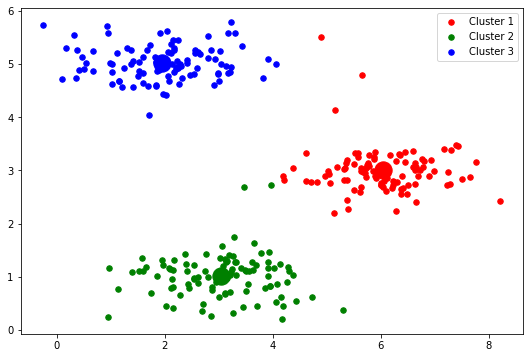

In [35]:
   fig, ax = plt.subplots(figsize=(9,6))
   ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
   ax.scatter(centroids[0,0],centroids[0,1],s=300, color='r')
   
   ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
   ax.scatter(centroids[1,0],centroids[1,1],s=300, color='g')
   
   ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
   ax.scatter(centroids[2,0],centroids[2,1],s=300, color='b')
   
   ax.legend()


In [36]:
#we need to compress the image 
    
    
image_data = loadmat('bird_small.mat')

print(image_data)





{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Nov 29 23:36:07 2011', '__version__': '1.0', '__globals__': [], 'A': array([[[219, 180, 103],
        [230, 185, 116],
        [226, 186, 110],
        ...,
        [ 14,  15,  13],
        [ 13,  15,  12],
        [ 12,  14,  12]],

       [[230, 193, 119],
        [224, 192, 120],
        [226, 192, 124],
        ...,
        [ 16,  16,  13],
        [ 14,  15,  10],
        [ 11,  14,   9]],

       [[228, 191, 123],
        [228, 191, 121],
        [220, 185, 118],
        ...,
        [ 14,  16,  13],
        [ 13,  13,  11],
        [ 11,  15,  10]],

       ...,

       [[ 15,  18,  16],
        [ 18,  21,  18],
        [ 18,  19,  16],
        ...,
        [ 81,  45,  45],
        [ 70,  43,  35],
        [ 72,  51,  43]],

       [[ 16,  17,  17],
        [ 17,  18,  19],
        [ 20,  19,  20],
        ...,
        [ 80,  38,  40],
        [ 68,  39,  40],
        [ 59,  43,  42]],

       [[ 15,  19,  

(128, 128, 3)


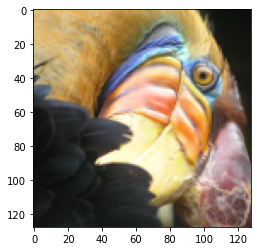

In [37]:
A = image_data['A']
print(A.shape)
plt.imshow(A)

In [38]:
# normalize value ranges
A = A / 255.



In [39]:
# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
print(X.shape)


(16384, 3)


In [40]:
# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)
print(initial_centroids)




[[0.65490196 0.5372549  0.43921569]
 [0.58823529 0.43921569 0.32941176]
 [0.7372549  0.62352941 0.64705882]
 [0.30588235 0.29803922 0.24705882]
 [0.97647059 0.94901961 0.64313725]
 [0.07843137 0.0745098  0.06666667]
 [0.16470588 0.18039216 0.18039216]
 [0.5254902  0.38039216 0.25882353]
 [0.35294118 0.27058824 0.27058824]
 [0.2745098  0.30980392 0.31764706]
 [0.20392157 0.19607843 0.19607843]
 [0.84313725 0.7372549  0.4745098 ]
 [0.08235294 0.08235294 0.07058824]
 [0.8627451  0.7372549  0.4627451 ]
 [0.74901961 0.65490196 0.49411765]
 [0.94509804 0.90196078 0.63529412]]


In [41]:
# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)




In [42]:
# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)



In [43]:
# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]



In [44]:
# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))



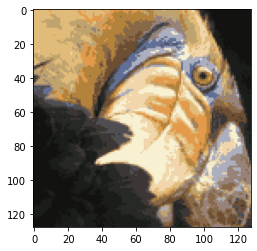

In [45]:
plt.imshow(X_recovered)


In [46]:
# Apply PCA

data = loadmat('ex7data1.mat')
X = data['X']
print(X.shape)
print(X)
print()


(50, 2)
[[3.38156267 3.38911268]
 [4.52787538 5.8541781 ]
 [2.65568187 4.41199472]
 [2.76523467 3.71541365]
 [2.84656011 4.17550645]
 [3.89067196 6.48838087]
 [3.47580524 3.63284876]
 [5.91129845 6.68076853]
 [3.92889397 5.09844661]
 [4.56183537 5.62329929]
 [4.57407171 5.39765069]
 [4.37173356 5.46116549]
 [4.19169388 4.95469359]
 [5.24408518 4.66148767]
 [2.8358402  3.76801716]
 [5.63526969 6.31211438]
 [4.68632968 5.6652411 ]
 [2.85051337 4.62645627]
 [5.1101573  7.36319662]
 [5.18256377 4.64650909]
 [5.70732809 6.68103995]
 [3.57968458 4.80278074]
 [5.63937773 6.12043594]
 [4.26346851 4.68942896]
 [2.53651693 3.88449078]
 [3.22382902 4.94255585]
 [4.92948801 5.95501971]
 [5.79295774 5.10839305]
 [2.81684824 4.81895769]
 [3.88882414 5.10036564]
 [3.34323419 5.89301345]
 [5.87973414 5.52141664]
 [3.10391912 3.85710242]
 [5.33150572 4.68074235]
 [3.37542687 4.56537852]
 [4.77667888 6.25435039]
 [2.6757463  3.73096988]
 [5.50027665 5.67948113]
 [1.79709714 3.24753885]
 [4.3225147  5.11

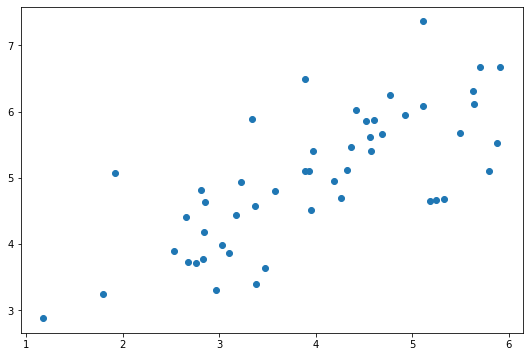

In [47]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(X[:, 0], X[:, 1])



In [53]:
U, S, V = pca(X)
print(U)
print()
print(S)
print()
print(V)


cov 
 [[1.11151143 0.4213388 ]
 [0.4213388  0.88848857]]

[[-0.79241747 -0.60997914]
 [-0.60997914  0.79241747]]

[1.43584536 0.56415464]

[[-0.79241747 -0.60997914]
 [-0.60997914  0.79241747]]


In [56]:
Z = project_data(X, U, 1)
print(Z)



[[-4.74689738]
 [-7.15889408]
 [-4.79563345]
 [-4.45754509]
 [-4.80263579]
 [-7.04081342]
 [-4.97025076]
 [-8.75934561]
 [-6.2232703 ]
 [-7.04497331]
 [-6.91702866]
 [-6.79543508]
 [-6.3438312 ]
 [-6.99891495]
 [-4.54558119]
 [-8.31574426]
 [-7.16920841]
 [-5.08083842]
 [-8.54077427]
 [-6.94102769]
 [-8.5978815 ]
 [-5.76620067]
 [-8.2020797 ]
 [-6.23890078]
 [-4.37943868]
 [-5.56947441]
 [-7.53865023]
 [-7.70645413]
 [-5.17158343]
 [-6.19268884]
 [-6.24385246]
 [-8.02715303]
 [-4.81235176]
 [-7.07993347]
 [-5.45953289]
 [-7.60014707]
 [-4.39612191]
 [-7.82288033]
 [-3.40498213]
 [-6.54290343]
 [-7.17879573]
 [-5.22572421]
 [-4.83081168]
 [-7.23907851]
 [-4.36164051]
 [-6.44590096]
 [-2.69118076]
 [-4.61386195]
 [-5.88236227]
 [-7.76732508]]


In [57]:
X_recovered = recover_data(Z, U, 1)
print(X_recovered)
print(X_recovered.shape)


[[3.76152442 2.89550838]
 [5.67283275 4.36677606]
 [3.80014373 2.92523637]
 [3.53223661 2.71900952]
 [3.80569251 2.92950765]
 [5.57926356 4.29474931]
 [3.93851354 3.03174929]
 [6.94105849 5.3430181 ]
 [4.93142811 3.79606507]
 [5.58255993 4.29728676]
 [5.48117436 4.21924319]
 [5.38482148 4.14507365]
 [5.02696267 3.8696047 ]
 [5.54606249 4.26919213]
 [3.60199795 2.77270971]
 [6.58954104 5.07243054]
 [5.681006   4.37306758]
 [4.02614513 3.09920545]
 [6.76785875 5.20969415]
 [5.50019161 4.2338821 ]
 [6.81311151 5.24452836]
 [4.56923815 3.51726213]
 [6.49947125 5.00309752]
 [4.94381398 3.80559934]
 [3.47034372 2.67136624]
 [4.41334883 3.39726321]
 [5.97375815 4.59841938]
 [6.10672889 4.70077626]
 [4.09805306 3.15455801]
 [4.90719483 3.77741101]
 [4.94773778 3.80861976]
 [6.36085631 4.8963959 ]
 [3.81339161 2.93543419]
 [5.61026298 4.31861173]
 [4.32622924 3.33020118]
 [6.02248932 4.63593118]
 [3.48356381 2.68154267]
 [6.19898705 4.77179382]
 [2.69816733 2.07696807]
 [5.18471099 3.99103461]


(5000, 1024)


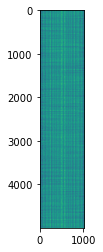

In [58]:
# Apply PCA on faces

faces = loadmat('ex7faces.mat')
X = faces['X']
print(X.shape)
plt.imshow(X)



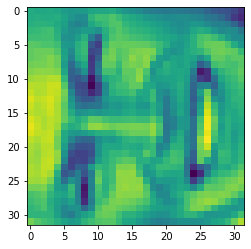

In [59]:
#show one face
face = np.reshape(X[41,:], (32, 32))
plt.imshow(face)



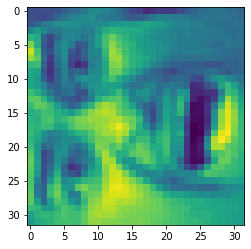

In [60]:
#show one face
face = np.reshape(X[256,:], (32, 32))
plt.imshow(face)



cov 
 [[1.57702283 1.51649405 1.41492652 ... 0.34969495 0.38232728 0.40044905]
 [1.51649405 1.51553873 1.44664108 ... 0.33710223 0.36960777 0.3865135 ]
 [1.41492652 1.44664108 1.44721143 ... 0.31888614 0.35201413 0.36938163]
 ...
 [0.34969495 0.33710223 0.31888614 ... 1.9690751  1.97195118 1.90097112]
 [0.38232728 0.36960777 0.35201413 ... 1.97195118 2.09255936 2.08177337]
 [0.40044905 0.3865135  0.36938163 ... 1.90097112 2.08177337 2.18494765]]



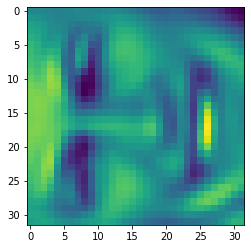

In [61]:
U, S, V = pca(X)
Z = project_data(X, U, 100)

X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[41,:], (32, 32))
plt.imshow(face)
 

